# Image Classification using CNN on CIFAR-10 Dataset

In [1]:
# importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [7]:
# Loading the data
cifar10 = tf.keras.datasets.cifar10

# Spliting into train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

**Pixel values ranges from 0 to 255 so, we divide all input images pixel values by 255.0 to rescale it in range between 0 and 1.**

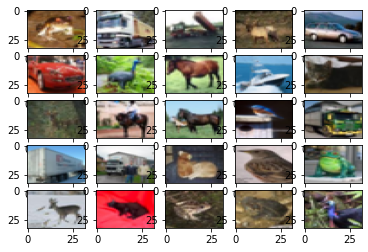

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
      for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

# **Building Model**

In [6]:
# number of classes
K = len(set(y_train))

# calculate total number of classes for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

# **Data Augmentation**

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# **Model Compile & Fit**

In [8]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

# Fiting the model
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 46s 20ms/step - loss: 1.4297 - accuracy: 0.5020 - val_loss: 1.2167 - val_accuracy: 0.5985
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9945 - accuracy: 0.6526 - val_loss: 0.9518 - val_accuracy: 0.6767
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8512 - accuracy: 0.7086 - val_loss: 1.0188 - val_accuracy: 0.6762
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.7518 - accuracy: 0.7429 - val_loss: 0.8386 - val_accuracy: 0.7181
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6936 - accuracy: 0.7641 - val_loss: 0.6729 - val_accuracy: 0.7777
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.6360 - accuracy: 0.7842 - val_loss: 0.6959 - val_accuracy: 0.7725
Epoch 7/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6004 - accuracy: 0.7940 - val_loss: 0.5498 -

# **Confusion Matrix**

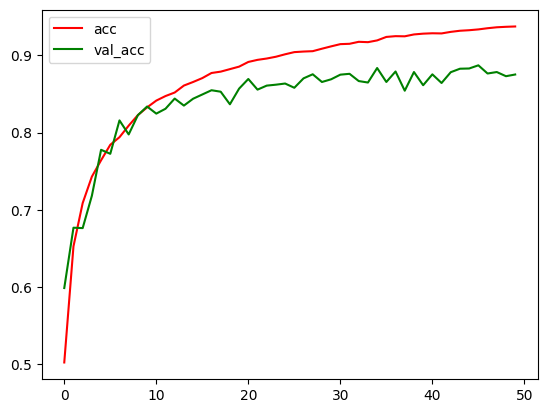

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

# **Image Classification System**

1/1 [==============================] - 0s 374ms/step
Original label is automobile and predicted label is automobile


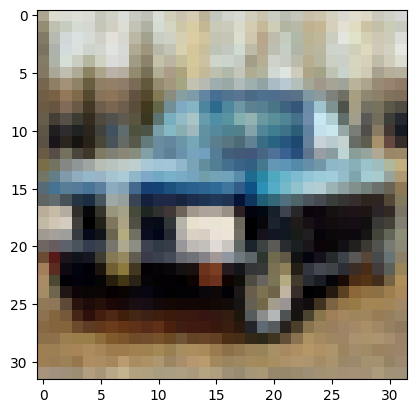

In [10]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 1500

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
      original_label, predicted_label))


**Before sending the image to our model we need to again reduce the pixel values between 0 and 1 and change its shape to (1,32,32,3) as our model expects the input to be in this form only.**

In [11]:
# save the model
model.save('image-classification.h5')